# Weeks 5 & 6 Exercises
### Angie Oehler
### 04/16/2021
## Exercise 2: Activity 8
In this activity we do the following

- Create a data frame from a given CSV
- Check for duplicates in the columns that matter
- Check for NaN in the columns that matter
- Apply our domain knowledge to single out and remove outliers
- Generate nice print statements as reports for differents steps
The data set is a 1000 row data set which represnets the traffic on a certain page of a website. The Names, email, and IP are faked out in order to keep the privacy

### Load the data (the file name is - visit_data.csv)

In [139]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
from math import cos, pi

In [140]:
# Load the file and print the header
df = pd.read_csv("visit_data.csv")
df.head()

# We can aready see that there are some missing values in this dataset (not sure about dupes yet)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


### Task - 1 (Are there duplicates?)

In [141]:
# Check for dupes and print results for each field
# Assume there are dupes in gender, so that field wasn't checked
print('There are duplicates in first_name: {}'.format(any(df.first_name.duplicated())))
print('There are duplicates in last_name: {}'.format(any(df.last_name.duplicated())))
print('There are duplicates in email: {}'.format(any(df.email.duplicated())))
print('There are duplicates in ip_address: {}'.format(any(df.ip_address.duplicated())))
print('There are duplicates in visit: {}'.format(any(df.visit.duplicated())))

There are duplicates in first_name: True
There are duplicates in last_name: True
There are duplicates in email: False
There are duplicates in ip_address: False
There are duplicates in visit: True


### Task - 2 (do any essential column contain NaN?)

In [142]:
# Check for missing values and print results for each field

print('There are nulls in first_name: %r' % df.first_name.isnull().values.any())
print('There are nulls in last_name: %r' % df.last_name.isnull().values.any())
print('There are nulls in email: %r' % df.email.isnull().values.any())
print('There are nulls in gender: %r' % df.gender.isnull().values.any())
print('There are nulls in ip_address: %r' % df.ip_address.isnull().values.any())
print('There are nulls in visit: %r' % df.visit.isnull().values.any())

There are nulls in first_name: True
There are nulls in last_name: True
There are nulls in email: False
There are nulls in gender: True
There are nulls in ip_address: False
There are nulls in visit: True


### Task - 3 (Get rid of the outliers)

In [143]:
# Preserve original size of data before we remove the outliers (needed later)
original = df.shape
original[0]

1000

In [144]:
# Maintain only the finite values in the visit field
df_finite = df[np.isfinite(df['visit'])]
new = df_finite.shape
new[0]

974

### Task - 4 (Report the size difference)

In [145]:
# Show the size difference between the new and original data sets
print('The size difference between the original and new data sets is: {} rows'.
      format(original[0] - new[0]))

The size difference between the original and new data sets is: 26 rows


### Task - 5 (Box plot visit to further check any Outliers)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a7e21178d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a7e2117f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a7e21174a8>],
 'medians': [<matplotlib.lines.Line2D at 0x2a7e2119630>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a7e2119978>],
 'means': []}

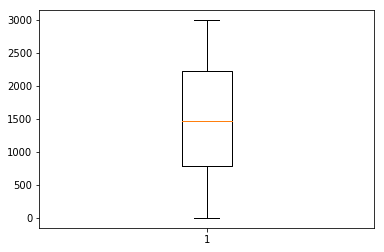

In [146]:
# Plot the new data set with a boxplot
plt.boxplot(df_finite.visit)

In [147]:
# It looks like most of the data points fall between 800 and 2300
# I think we're safe to remove anything below 200 and above 2850 
    # Debated bwtween 2800 and 2900, so plit the diff and landed on 2850
df_final = df_finite[(df_finite['visit'] <= 2850) & (df_finite['visit'] >= 200)]  
new_a = df_final.shape[0]
new_a

880

{'whiskers': [<matplotlib.lines.Line2D at 0x2a7e1c7ca58>,
 'caps': [<matplotlib.lines.Line2D at 0x2a7e1c7ce80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a7e1c7c668>],
 'medians': [<matplotlib.lines.Line2D at 0x2a7e1c717b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a7e1c71b00>],
 'means': []}

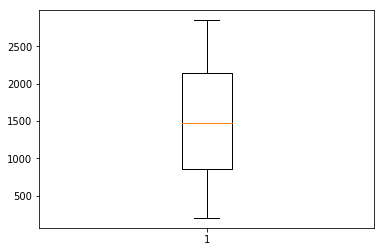

In [148]:
# new boxplot
plt.boxplot(df_final.visit)

In [149]:
#Get the final data set size
print('The final size of our data set is: {}'.format(new_a))

The final size of our data set is: 880


## Exercise 3: SQLlite
Insert data into a SQL Lite database 
- Create a table with the following data (Hint: Python for Data Analysis page 191):
    - Name, Address, City, State, Zip, Phone Number
    - Add at least 10 rows of data and submit your code with a query generating your results.

In [150]:
# import SQLlite
import sqlite3

In [194]:
# Create table 
# Include an exists statement so that we don't get an error 
create_table = """
create table if not exists ClientName
(Name varchar(50) not null,
Address varchar(75) not null,
City char(30) not null,
State char(2) not null,
Zip int not null,
PhoneNum int not null
);"""

In [195]:
# Run the create table statement and commit it
con = sqlite3.connect('mydata.sqlite')
con.execute(create_table)
con.commit()

In [228]:
# Truncate table so that dupe entries aren't created when data is added again
# ** this step is only needed if the data entry step is rpeated
truncate_cursor = con.execute('delete from ClientName')
truncate_data = truncate_cursor.fetchall()
truncate_cursor

In [229]:
# Create data to insert into ClientName table
client_info = [('Dean Winchester', '123 The Bunker', 'Lebanon', 'KS', 12345, 1234567890),
    ('Sam Winchester', '123 The Bunker', 'Lebanon', 'KS', 12345, 1234567891),
    ('Bobby Singer', '456 Auto Scrap Yard', 'Sioux City', 'IA', 45678, 7894561231),
    ('Jody Mills', '4589 Sheriff  office', 'Sioux City', 'IA', 456789, 9874563215),
    ('Fox Mulder', 'FBI Basement', 'Washington', 'DC', 12125, 1239874566),
    ('Dana Scully','FBI Basement', 'Washington', 'DC', 12125, 5239874566),
    ('Buffy Summers', '789 Fake St', 'Sunnydale', 'CA', 90915, 7148965489),
    ('William the Bloody, AKA Spike', 'The Crypt', 'Sunnydale', 'CA', 90954, 9654321987),
    ('Willow Rosenberg', '59856 Nota St', 'Sunnydale', 'CA', 98689, 7156345698),
    ('Rupert Giles', 'The Library', 'The Hellmouth', 'CA', 99011, 7445612345)]

In [230]:
# Commit the data insert
insert_data = "insert into ClientName values(?,?,?,?,?,?)"
con.executemany(insert_data, client_info)
con.commit

<function Connection.commit>

In [231]:
# Select data from the ClientName table
select_cursor = con.execute('select * from ClientName')
select_data = select_cursor.fetchall()
select_data

[('Dean Winchester', '123 The Bunker', 'Lebanon', 'KS', 12345, 1234567890),
 ('Sam Winchester', '123 The Bunker', 'Lebanon', 'KS', 12345, 1234567891),
 ('Bobby Singer',
  '456 Auto Scrap Yard',
  'Sioux City',
  'IA',
  45678,
  7894561231),
 ('Jody Mills',
  '4589 Sheriff  office',
  'Sioux City',
  'IA',
  456789,
  9874563215),
 ('Fox Mulder', 'FBI Basement', 'Washington', 'DC', 12125, 1239874566),
 ('Dana Scully', 'FBI Basement', 'Washington', 'DC', 12125, 5239874566),
 ('Buffy Summers', '789 Fake St', 'Sunnydale', 'CA', 90915, 7148965489),
 ('William the Bloody, AKA Spike',
  'The Crypt',
  'Sunnydale',
  'CA',
  90954,
  9654321987),
 ('Willow Rosenberg', '59856 Nota St', 'Sunnydale', 'CA', 98689, 7156345698),
 ('Rupert Giles', 'The Library', 'The Hellmouth', 'CA', 99011, 7445612345)]